In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.impute import SimpleImputer,KNNImputer

In [285]:
titanic_df = pd.read_csv("F:/dataset_for_ML/titanic/Titanic-Dataset.csv")

In [286]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.00,0,0,345778,9.5000,NaN,S
487,488,0,1,"Kent, Mr. Edward Austin",male,58.00,0,0,11771,29.7000,B37,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.00,0,0,2663,7.2292,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.00,0,0,347071,7.7750,NaN,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.00,1,2,113760,120.0000,B96 B98,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.00,0,0,8471,8.3625,NaN,S


In [287]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [288]:
titanic_df.duplicated().sum()

0

In [289]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [290]:
titanic_df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [291]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [292]:
titanic_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

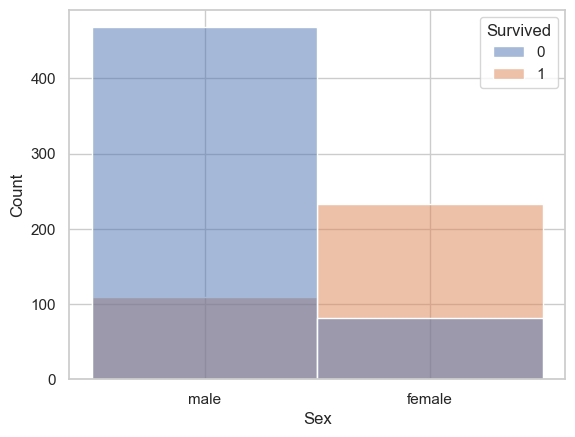

In [293]:
sns.histplot(data=titanic_df,x=titanic_df["Sex"],hue="Survived")

In [294]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S


In [295]:
titanic_df[["Pclass","Fare"]].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


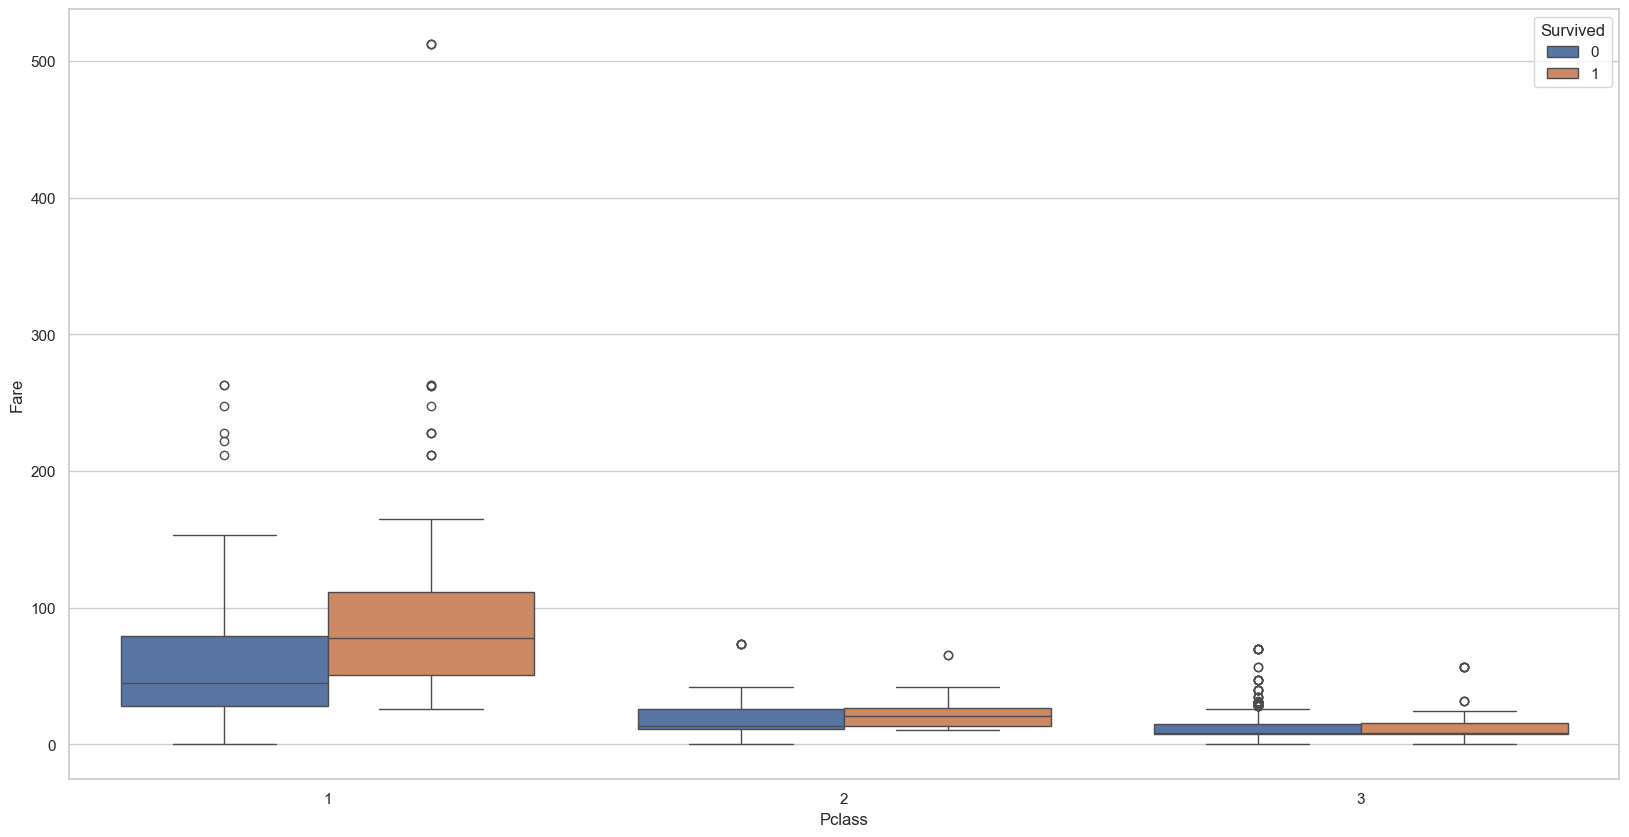

In [296]:
plt.figure(figsize=(20,10))
sns.boxplot(data=titanic_df,x=titanic_df["Pclass"],y=titanic_df["Fare"],hue="Survived")
plt.show()

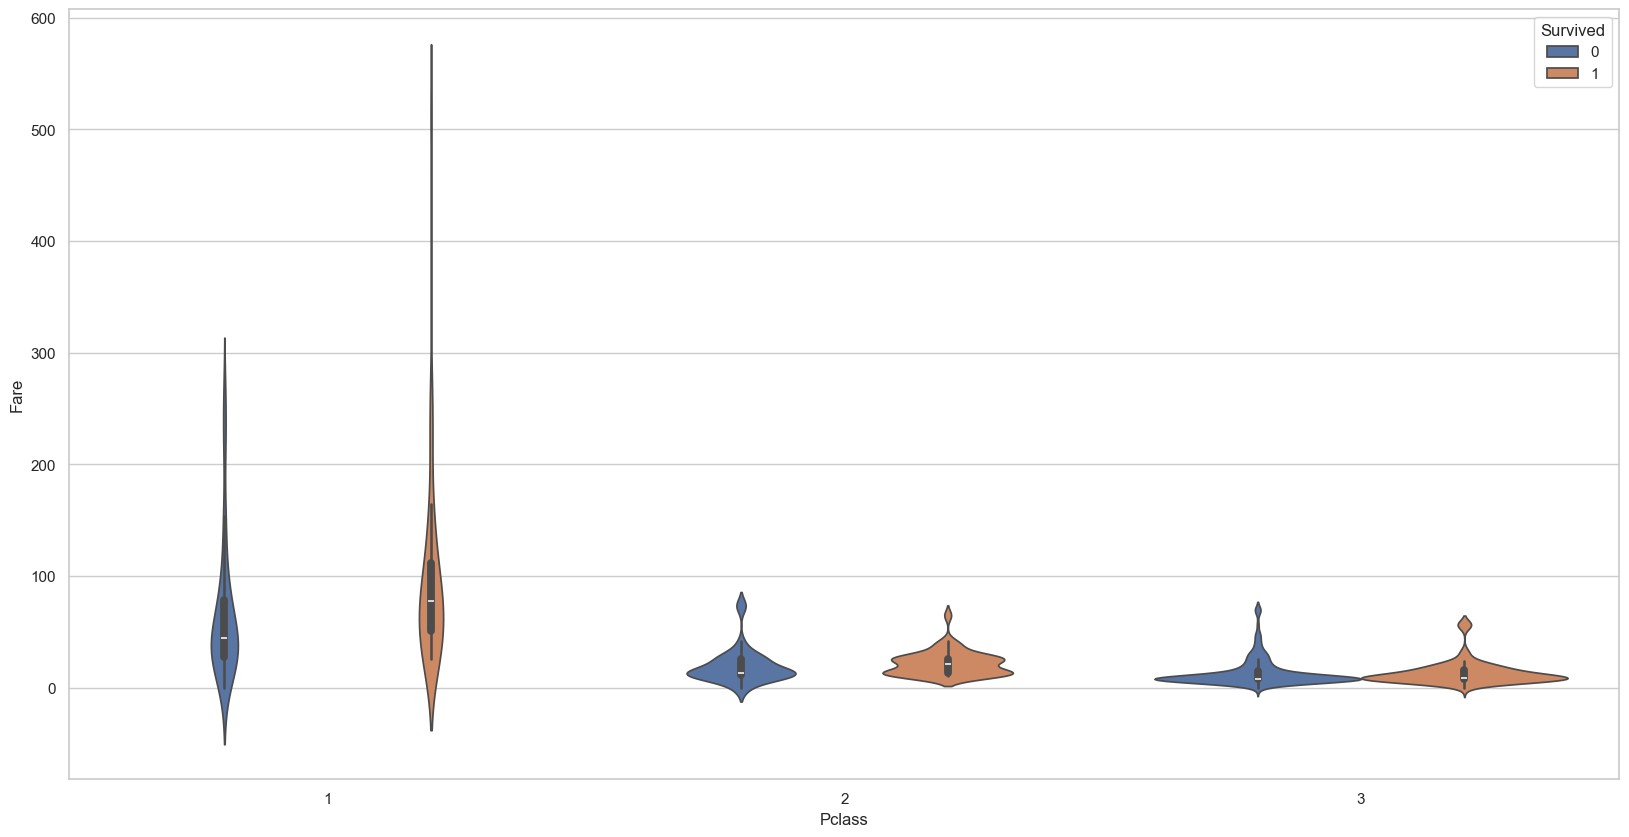

In [297]:
plt.figure(figsize=(20,10))
sns.violinplot(data=titanic_df,x=titanic_df["Pclass"],y=titanic_df["Fare"],hue="Survived")
plt.show()

In [298]:
# lets split the name into mr,mrs and fname and lname! 
titanic_df["splitted_names"] = titanic_df["Name"].str.split(',')

In [299]:

titanic_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S,"[Lobb, Mrs. William Arthur (Cordelia K Stanli..."
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S,"[Parr, Mr. William Henry Marsh]"
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S,"[Brown, Miss. Amelia ""Mildred""]"
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S,"[Braund, Mr. Lewis Richard]"
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C,"[Guggenheim, Mr. Benjamin]"
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,"[Barkworth, Mr. Algernon Henry Wilson]"
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,"[Kent, Mr. Edward Austin]"
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,"[Thayer, Mr. John Borland Jr]"
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S,"[Gavey, Mr. Lawrence]"
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S,"[Svensson, Mr. Olof]"


In [300]:
#### now for first name, 
titanic_df["last_name"] = titanic_df["splitted_names"].str[0].str.strip()
titanic_df["first_name"] = titanic_df["splitted_names"].str[1].str.strip()

In [301]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"[Montvila, Rev. Juozas]",Montvila,Rev. Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Graham,Miss. Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Behr,Mr. Karl Howell


In [302]:
titanic_df["honorifics"] = titanic_df['first_name'].str.extract(r'^([^\.]+)')


In [303]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Braund,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Heikkinen,Miss. Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Allen,Mr. William Henry,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"[Montvila, Rev. Juozas]",Montvila,Rev. Juozas,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Graham,Miss. Margaret Edith,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Johnston,"Miss. Catherine Helen ""Carrie""",Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Behr,Mr. Karl Howell,Mr


In [304]:
titanic_df["honorifics"].value_counts()

honorifics
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [305]:
###### now lets drop the table Name 
titanic_df.drop(columns="Name",inplace=True)

In [306]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Braund,Mr. Owen Harris,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Heikkinen,Miss. Laina,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Allen,Mr. William Henry,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,"[Montvila, Rev. Juozas]",Montvila,Rev. Juozas,Rev
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Graham,Miss. Margaret Edith,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Johnston,"Miss. Catherine Helen ""Carrie""",Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Behr,Mr. Karl Howell,Mr


In [307]:
titanic_df["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [308]:
titanic_df[titanic_df["Ticket"] == "347082"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics
13,14,0,3,male,39.0,1,5,347082,31.275,NaN,S,"[Andersson, Mr. Anders Johan]",Andersson,Mr. Anders Johan,Mr
119,120,0,3,female,2.0,4,2,347082,31.275,NaN,S,"[Andersson, Miss. Ellis Anna Maria]",Andersson,Miss. Ellis Anna Maria,Miss
541,542,0,3,female,9.0,4,2,347082,31.275,NaN,S,"[Andersson, Miss. Ingeborg Constanzia]",Andersson,Miss. Ingeborg Constanzia,Miss
542,543,0,3,female,11.0,4,2,347082,31.275,NaN,S,"[Andersson, Miss. Sigrid Elisabeth]",Andersson,Miss. Sigrid Elisabeth,Miss
610,611,0,3,female,39.0,1,5,347082,31.275,NaN,S,"[Andersson, Mrs. Anders Johan (Alfrida Konsta...",Andersson,Mrs. Anders Johan (Alfrida Konstantia Brogren),Mrs
813,814,0,3,female,6.0,4,2,347082,31.275,NaN,S,"[Andersson, Miss. Ebba Iris Alfrida]",Andersson,Miss. Ebba Iris Alfrida,Miss
850,851,0,3,male,4.0,4,2,347082,31.275,NaN,S,"[Andersson, Master. Sigvard Harald Elias]",Andersson,Master. Sigvard Harald Elias,Master


There is a very very good relation between Ticket and PClass, and also from above we can confirm that ! Now, lets check for andersson last_name

In [309]:
titanic_df[titanic_df["last_name"] == "Andersson"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics
13,14,0,3,male,39.0,1,5,347082,31.2750,NaN,S,"[Andersson, Mr. Anders Johan]",Andersson,Mr. Anders Johan,Mr
68,69,1,3,female,17.0,4,2,3101281,7.9250,NaN,S,"[Andersson, Miss. Erna Alexandra]",Andersson,Miss. Erna Alexandra,Miss
119,120,0,3,female,2.0,4,2,347082,31.2750,NaN,S,"[Andersson, Miss. Ellis Anna Maria]",Andersson,Miss. Ellis Anna Maria,Miss
146,147,1,3,male,27.0,0,0,350043,7.7958,NaN,S,"[Andersson, Mr. August Edvard (""Wennerstrom"")]",Andersson,"Mr. August Edvard (""Wennerstrom"")",Mr
541,542,0,3,female,9.0,4,2,347082,31.2750,NaN,S,"[Andersson, Miss. Ingeborg Constanzia]",Andersson,Miss. Ingeborg Constanzia,Miss
542,543,0,3,female,11.0,4,2,347082,31.2750,NaN,S,"[Andersson, Miss. Sigrid Elisabeth]",Andersson,Miss. Sigrid Elisabeth,Miss
610,611,0,3,female,39.0,1,5,347082,31.2750,NaN,S,"[Andersson, Mrs. Anders Johan (Alfrida Konsta...",Andersson,Mrs. Anders Johan (Alfrida Konstantia Brogren),Mrs
813,814,0,3,female,6.0,4,2,347082,31.2750,NaN,S,"[Andersson, Miss. Ebba Iris Alfrida]",Andersson,Miss. Ebba Iris Alfrida,Miss
850,851,0,3,male,4.0,4,2,347082,31.2750,NaN,S,"[Andersson, Master. Sigvard Harald Elias]",Andersson,Master. Sigvard Harald Elias,Master


From this we can clearly see that there were more anderson in the ship, with differnt Ticket, but they all constitute to same almost same sibSp or Parch, which means that they were related except Mr.AugustEdvard, and he survived, while most of them lost their life ! , lets check for another ticket ! 

In [310]:
titanic_df[titanic_df["Ticket"] == "CA. 2343"] 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics
159,160,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,"[Sage, Master. Thomas Henry]",Sage,Master. Thomas Henry,Master
180,181,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,"[Sage, Miss. Constance Gladys]",Sage,Miss. Constance Gladys,Miss
201,202,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,"[Sage, Mr. Frederick]",Sage,Mr. Frederick,Mr
324,325,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,"[Sage, Mr. George John Jr]",Sage,Mr. George John Jr,Mr
792,793,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,"[Sage, Miss. Stella Anna]",Sage,Miss. Stella Anna,Miss
846,847,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,"[Sage, Mr. Douglas Bullen]",Sage,Mr. Douglas Bullen,Mr
863,864,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,"[Sage, Miss. Dorothy Edith ""Dolly""]",Sage,"Miss. Dorothy Edith ""Dolly""",Miss


hmmm, similar results, lets value_count by last_Name and see what we can get! 

In [311]:
titanic_df["last_name"].value_counts()

last_name
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

In [312]:
titanic_df[titanic_df["last_name"] == "Carter"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics
249,250,0,2,male,54.0,1,0,244252,26.0,NaN,S,"[Carter, Rev. Ernest Courtenay]",Carter,Rev. Ernest Courtenay,Rev
390,391,1,1,male,36.0,1,2,113760,120.0,B96 B98,S,"[Carter, Mr. William Ernest]",Carter,Mr. William Ernest,Mr
435,436,1,1,female,14.0,1,2,113760,120.0,B96 B98,S,"[Carter, Miss. Lucile Polk]",Carter,Miss. Lucile Polk,Miss
763,764,1,1,female,36.0,1,2,113760,120.0,B96 B98,S,"[Carter, Mrs. William Ernest (Lucile Polk)]",Carter,Mrs. William Ernest (Lucile Polk),Mrs
802,803,1,1,male,11.0,1,2,113760,120.0,B96 B98,S,"[Carter, Master. William Thornton II]",Carter,Master. William Thornton II,Master
854,855,0,2,female,44.0,1,0,244252,26.0,NaN,S,"[Carter, Mrs. Ernest Courtenay (Lilian Hughes)]",Carter,Mrs. Ernest Courtenay (Lilian Hughes),Mrs


This is what i wanted to look, here we have similar ticket for same family members, and they survived too with PClass==1, but other two who seems to be, well related but in different class, they died, You can also clearly see from their first name , Rev.Ernest Courtenay and Mrs.Rev.Ernest Courtenay, they seem to be husband and wife, boarding Pclass==2, deck with cabin NAN both embarked from S, and their SibSp =1, which means that they were with each other, one of them and one was male and another was female and they both died ! while the other Carter survived whose tickets were number 	113760

SO, we are going to do few things , 
1) get the total family size 
2) check the relation between Plcass and survived , age and survived
3) break down the first_name 
4) Impute the age 
5) try to guess the relation between Ticket and Pclass, and if we aere able to get the relation , then i belive we can fill out Cabin too,

In [313]:
# lets get the total_people_they_were_related_with or simply say total number of people that were travelling at the same time ! 
titanic_df["total_pep"] = titanic_df["SibSp"] + titanic_df["Parch"]

In [314]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics,total_pep
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Braund,Mr. Owen Harris,Mr,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Heikkinen,Miss. Laina,Miss,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Allen,Mr. William Henry,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,"[Montvila, Rev. Juozas]",Montvila,Rev. Juozas,Rev,0
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Graham,Miss. Margaret Edith,Miss,0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Johnston,"Miss. Catherine Helen ""Carrie""",Miss,3
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Behr,Mr. Karl Howell,Mr,0


In [315]:
titanic_df["Cabin"].value_counts() 

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

My guess for cabin is that we only need first letter, we can do that some other time ! 

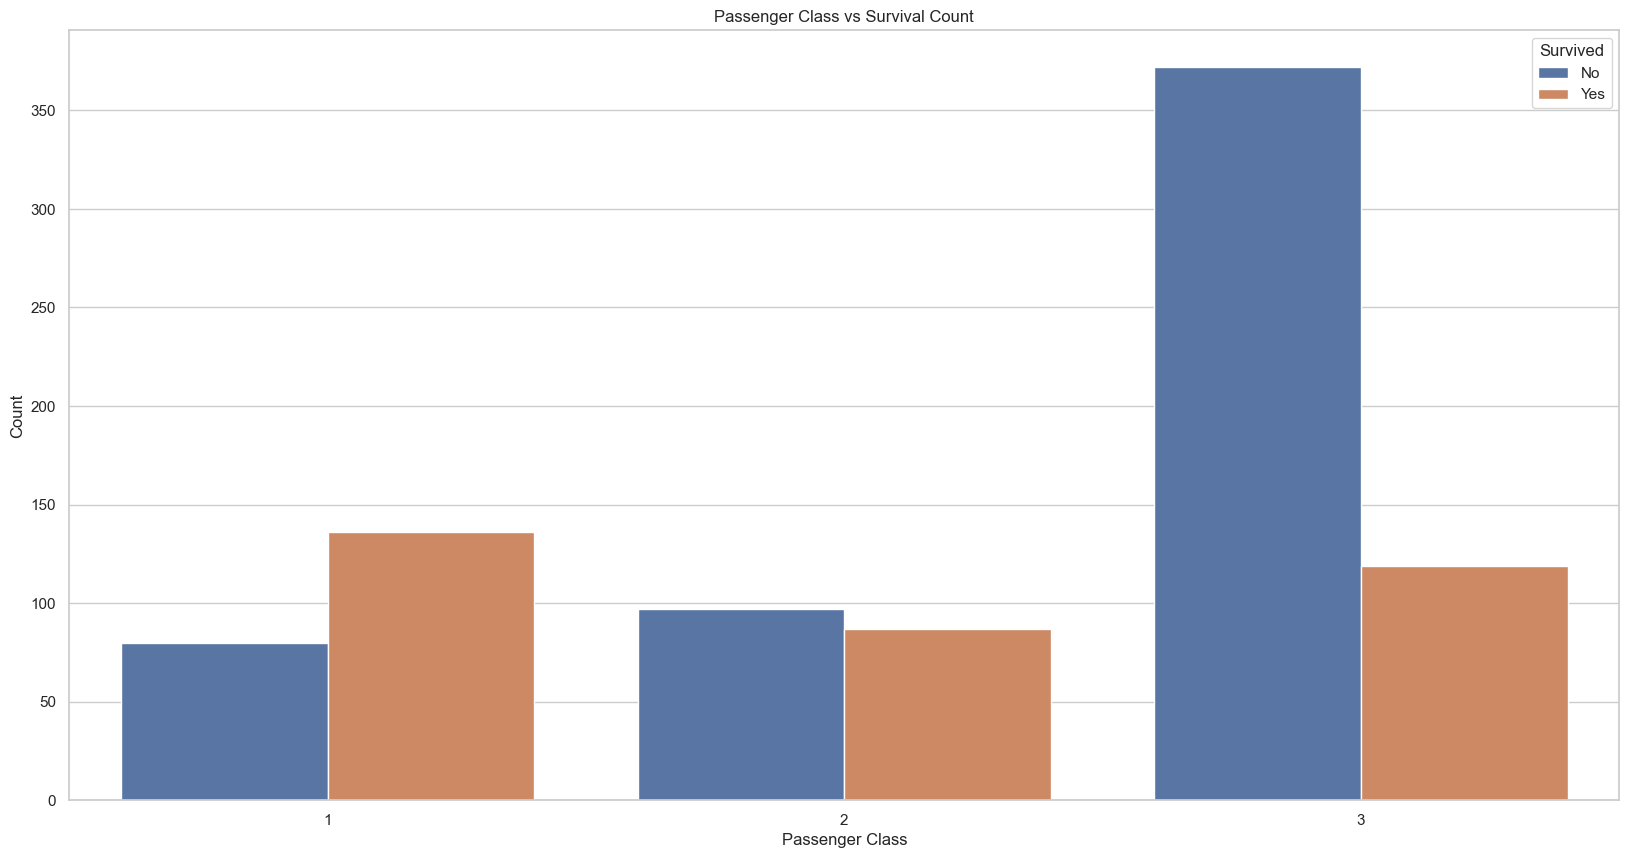

In [316]:
plt.figure(figsize=(20,10))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Passenger Class vs Survival Count')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [317]:
titanic_df.shape

(891, 16)

In [318]:
titanic_df["Age"].isna().sum()/titanic_df.shape[0]

0.19865319865319866

In [319]:
temp_df = titanic_df[~(titanic_df["Age"].isna())][["Age","Survived","Pclass"]]

In [320]:
temp_df.head()

,Age,Survived,Pclass
0,22.0,0,3
1,38.0,1,1
2,26.0,1,3
3,35.0,1,1
4,35.0,0,3


In [321]:
temp_df.describe()

,Age,Survived,Pclass
count,714.000000,714.000000,714.000000
mean,29.699118,0.406162,2.236695
std,14.526497,0.491460,0.838250
min,0.420000,0.000000,1.000000
25%,20.125000,0.000000,1.000000
50%,28.000000,0.000000,2.000000
75%,38.000000,1.000000,3.000000
max,80.000000,1.000000,3.000000


<Axes: xlabel='Age', ylabel='Count'>

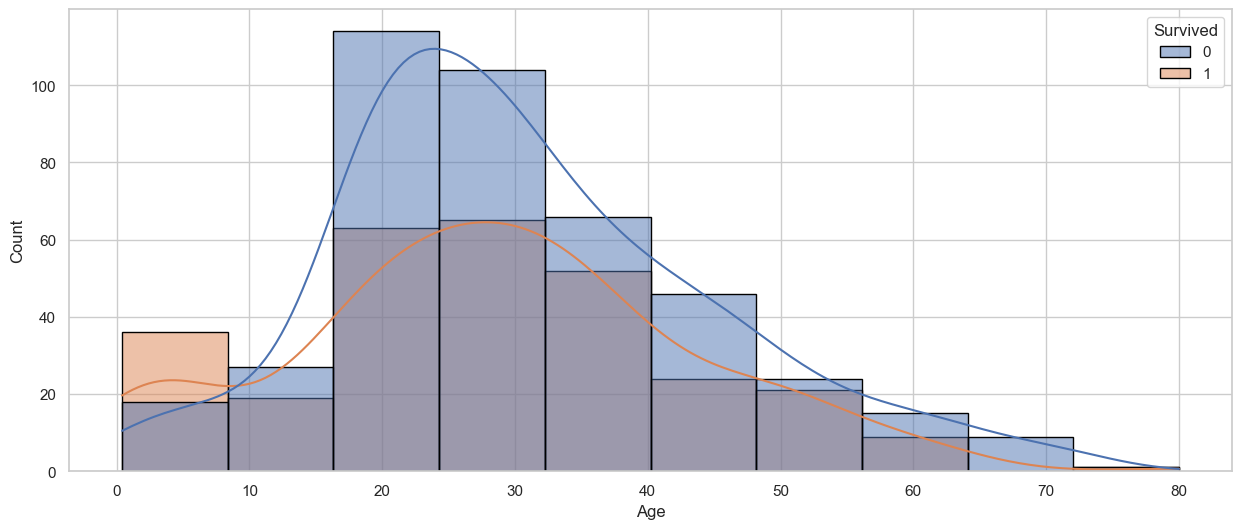

In [322]:
plt.figure(figsize=(15,6))
# sns.histplot(data=titanic_df,x=temp_df["Age"],hue="Survived",bins=10,fill=True)
sns.set(style="whitegrid")  # or "darkgrid", "ticks"

sns.histplot(data=temp_df, x='Age', bins=10, kde=True, color='skyblue', edgecolor='black',hue="Survived")

In [323]:
temp_df["Survived"].value_counts(), titanic_df["Survived"].value_counts()

(Survived
 0    424
 1    290
 Name: count, dtype: int64,
 Survived
 0    549
 1    342
 Name: count, dtype: int64)

So, in this Dataset, there are more dead people than who have survived ! okay dokay ! 


In [324]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics,total_pep
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Braund,Mr. Owen Harris,Mr,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Heikkinen,Miss. Laina,Miss,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Allen,Mr. William Henry,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,"[Montvila, Rev. Juozas]",Montvila,Rev. Juozas,Rev,0
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Graham,Miss. Margaret Edith,Miss,0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Johnston,"Miss. Catherine Helen ""Carrie""",Miss,3
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Behr,Mr. Karl Howell,Mr,0


In [325]:
# not lets split the first name ,
titanic_df["first_name_splitted"] = titanic_df["first_name"].str.split(".")

In [326]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,first_name,honorifics,total_pep,first_name_splitted
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Braund,Mr. Owen Harris,Mr,1,"[Mr, Owen Harris]"
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,1,"[Mrs, John Bradley (Florence Briggs Thayer)]"
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Heikkinen,Miss. Laina,Miss,0,"[Miss, Laina]"
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,1,"[Mrs, Jacques Heath (Lily May Peel)]"
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Allen,Mr. William Henry,Mr,0,"[Mr, William Henry]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,"[Montvila, Rev. Juozas]",Montvila,Rev. Juozas,Rev,0,"[Rev, Juozas]"
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,"[Graham, Miss. Margaret Edith]",Graham,Miss. Margaret Edith,Miss,0,"[Miss, Margaret Edith]"
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[Johnston, Miss. Catherine Helen ""Carrie""]",Johnston,"Miss. Catherine Helen ""Carrie""",Miss,3,"[Miss, Catherine Helen ""Carrie""]"
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,"[Behr, Mr. Karl Howell]",Behr,Mr. Karl Howell,Mr,0,"[Mr, Karl Howell]"


In [327]:
titanic_df["fname"] = titanic_df["first_name_splitted"].str[1].str.strip()

In [328]:
titanic_df.drop(columns=["first_name","first_name_splitted"],inplace=True)

In [329]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,splitted_names,last_name,honorifics,total_pep,fname
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[Braund, Mr. Owen Harris]",Braund,Mr,1,Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"[Cumings, Mrs. John Bradley (Florence Briggs ...",Cumings,Mrs,1,John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[Heikkinen, Miss. Laina]",Heikkinen,Miss,0,Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]",Futrelle,Mrs,1,Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"[Allen, Mr. William Henry]",Allen,Mr,0,William Henry
